# installing kaggle

In [1]:
! pip install kaggle

# mount main drive 

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# json file upload

In [3]:
! mkdir ~/.kaggle
!cp /content/drive/MyDrive/kaggle.json ~/.kaggle/kaggle.json
! chmod 600 ~/.kaggle/kaggle.json

# Downloading dataset as zip

In [2]:
! kaggle datasets download bhaveshmittal/melanoma-cancer-dataset

Dataset URL: https://www.kaggle.com/datasets/bhaveshmittal/melanoma-cancer-dataset
License(s): CC0-1.0
melanoma-cancer-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


# unzipping dataset

In [3]:
!unzip /content/melanoma-cancer-dataset.zip

Archive:  /content/melanoma-cancer-dataset.zip
replace test/Benign/6299.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

# installing libraries

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow import keras  # Import keras from tensorflow directly
from tensorflow.keras import layers, models
from tensorflow.keras.layers import Conv2D, Dense, Dropout, Flatten, MaxPooling2D, BatchNormalization, ReLU
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import optimizers
from tensorflow.keras import regularizers  # Import regularizers from tf.keras

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

from sklearn.metrics import classification_report

tf.random.set_seed(23)

import os
import cv2
import random
import warnings
warnings.filterwarnings('ignore')

# Now you can use optimizers and regularizers like this:
optimizer = optimizers.Adam(learning_rate=0.001)
regularizer = regularizers.l2(0.01)  # Example usage of l2 regularizer

# installing other libraries...might need them

In [5]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.layers import Conv2D, Dense, Dropout, Flatten, MaxPooling2D, BatchNormalization, ReLU
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2


# giving the dataset directory

In [6]:
train_path = '/content/train'
test_path = '/content/test'

img_width,img_height,channel = 224,224,3

# creating dataframe

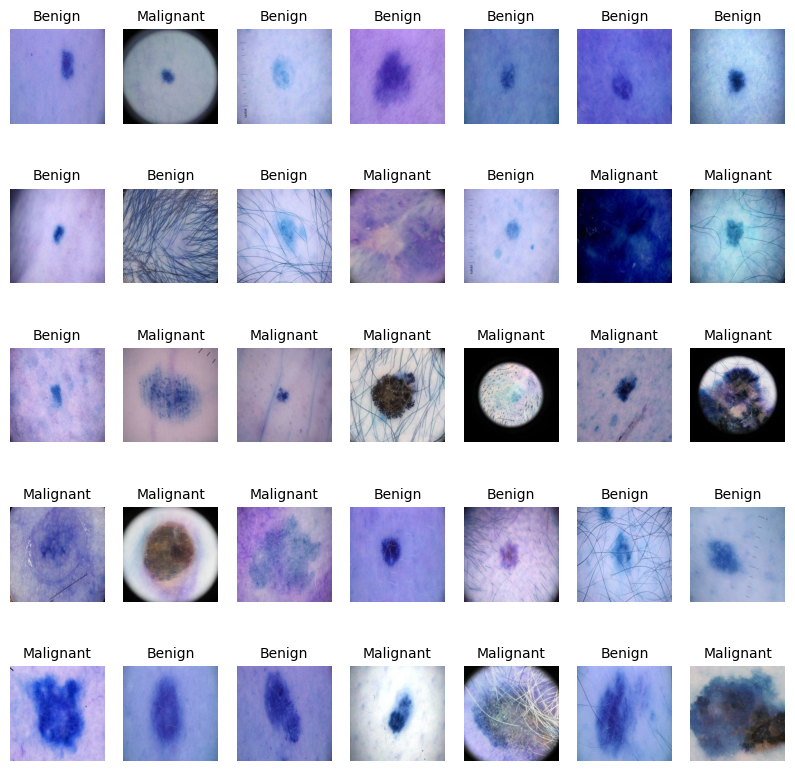

In [7]:
# Define the two classes for classification
classes = ['Benign', 'Malignant']

# Function to import data from a dataset given its path and categories
def import_data(dataset, path, categories):
    # Iterate over each category
    for i in categories:
        # Create the full path for the current category
        full_path = os.path.join(path, i)
        # Determine the label as the index of the category
        label = categories.index(i)
        # Iterate over each image in the category directory
        for j in os.listdir(full_path):
            try:
                # Read the image using OpenCV
                img = cv2.imread(os.path.join(full_path, j))
                # Resize the image to the specified width and height
                img_resized = cv2.resize(img, (img_width, img_height))
                # Append the resized image and label to the dataset
                dataset.append([img_resized, label])
            except:
                # If there's an error reading the image, skip it
                pass
    # Shuffle the dataset to mix images from different categories
    random.shuffle(dataset)

# Create an empty list to hold the training data
train_df = []

# Import data into the training dataset
import_data(train_df, train_path, classes)

# Convert the list into a DataFrame with columns for images and labels
train_df = pd.DataFrame(train_df, columns=['image', 'label'])

# Convert the list of images into a NumPy array for further processing
train_stack = np.stack(train_df.image)

# Plot a grid of images to visualize the dataset
plt.figure(figsize=(10, 10))
# Loop to display the first 35 images in the dataset
for i in range(35):
    plt.subplot(5, 7, i + 1)  # Create a subplot for each image
    plt.imshow(train_df.image[i])  # Display the image
    # Set the title of the subplot to the class name of the image
    plt.title(classes[train_df.label[i]], size=10)
    plt.axis('off')  # Turn off axis labels


# downloading pretrained model

In [8]:
# Import various pre-trained models from Keras applications
from tensorflow.keras.applications import VGG16, VGG19, ResNet50, ResNet101, InceptionV3, MobileNet, Xception, NASNetMobile
from tensorflow.keras.applications import DenseNet121, EfficientNetB0

# Load the pre-trained DenseNet121 model without the top classification layer
densenet121 = DenseNet121(
    include_top=False,  # Exclude the fully connected layer at the top
    weights='imagenet',  # Load weights pre-trained on ImageNet
    input_shape=(img_width, img_height, 3))  # Define input shape for the model

# Set the DenseNet121 model to non-trainable to freeze its weights
densenet121.trainable = False

# Load the pre-trained EfficientNetB0 model without the top classification layer
efficientnetB0 = EfficientNetB0(
    include_top=False,
    weights='imagenet',
    input_shape=(img_width, img_height, 3))

# Freeze the weights of the EfficientNetB0 model
efficientnetB0.trainable = False

# Load the pre-trained InceptionV3 model without the top classification layer
inceptionv3 = InceptionV3(
    include_top=False,
    weights='imagenet',
    input_shape=(img_width, img_height, 3))

# Freeze the weights of the InceptionV3 model
inceptionv3.trainable = False

# Load the pre-trained MobileNet model without the top classification layer
mobilenet = MobileNet(
    include_top=False,
    weights='imagenet',
    input_shape=(img_width, img_height, 3))

# Freeze the weights of the MobileNet model
mobilenet.trainable = False

# Load the pre-trained Xception model without the top classification layer
xception = Xception(
    include_top=False,
    weights='imagenet',
    input_shape=(img_width, img_height, 3))

# Freeze the weights of the Xception model
xception.trainable = False

# Load the pre-trained NASNetMobile model without the top classification layer
nasnetmobile = NASNetMobile(
    include_top=False,
    weights='imagenet',
    input_shape=(img_width, img_height, 3))

# Freeze the weights of the NASNetMobile model
nasnetmobile.trainable = False

# Load the pre-trained VGG16 model without the top classification layer
vgg16 = VGG16(
    include_top=False,
    weights='imagenet',
    input_shape=(img_width, img_height, 3))

# Freeze the weights of the VGG16 model
vgg16.trainable = False

# Load the pre-trained VGG19 model without the top classification layer
vgg19 = VGG19(
    include_top=False,
    weights='imagenet',
    input_shape=(img_width, img_height, 3))

# Freeze the weights of the VGG19 model
vgg19.trainable = False

# Load the pre-trained ResNet50 model without the top classification layer
resnet50 = ResNet50(
    include_top=False,
    weights='imagenet',
    input_shape=(img_width, img_height, 3))

# Freeze the weights of the ResNet50 model
resnet50.trainable = False

# Load the pre-trained ResNet101 model without the top classification layer
resnet101 = ResNet101(
    include_top=False,
    weights='imagenet',
    input_shape=(img_width, img_height, 3))

# Freeze the weights of the ResNet101 model
resnet101.trainable = False


171446536/171446536 [==============================] - 4s 0us/step


# test datafarme creating

In [9]:
# Import performance metrics from scikit-learn to evaluate model performance
from sklearn.metrics import accuracy_score  # Metric to calculate accuracy
from sklearn.metrics import precision_score  # Metric to calculate precision
from sklearn.metrics import recall_score  # Metric to calculate recall
from sklearn.metrics import f1_score  # Metric to calculate F1-score
from sklearn.metrics import confusion_matrix  # Metric to create a confusion matrix

# Create an empty list to hold the test data
test_df = []

# Import data into the test dataset using the previously defined import_data function
import_data(test_df, test_path, classes)

# Convert the list into a DataFrame with columns for images and labels
test_df = pd.DataFrame(test_df, columns=['image', 'label'])



# appling ResNet50

In [ ]:
# Import necessary libraries for building and saving the model
import pickle  # For saving the training history
from tensorflow.keras.models import Sequential  # To create a linear stack of layers
from tensorflow.keras.optimizers import Adam  # For using the Adam optimizer
from tensorflow.keras.applications import ResNet50  # To use the pre-trained ResNet50 model
from tensorflow.keras import layers  # For adding different layers to the model
from tensorflow import keras  # To access various Keras functionalities

# Assuming resnet50 is already defined and loaded
# Build the Sequential model
model_1 = Sequential()

# Add the pre-trained ResNet50 model to the Sequential model
model_1.add(resnet50)

# Add a Flatten layer to convert 2D feature maps to 1D feature vectors
model_1.add(layers.Flatten())

# Add a BatchNormalization layer to normalize the inputs to the next layer
model_1.add(layers.BatchNormalization())

# Add a Dense layer with 128 units, ReLU activation, and L2 regularization
model_1.add(layers.Dense(units=128, activation='relu', kernel_regularizer=keras.regularizers.l2(0.002)))

# Add a Dropout layer to reduce overfitting by randomly dropping 20% of the units
model_1.add(layers.Dropout(0.2))

# Add the output Dense layer with 2 units (assuming binary classification) and softmax activation
model_1.add(layers.Dense(units=2, activation='softmax'))  # Assuming the correct number of classes is 2

# Compile the model with Adam optimizer, sparse categorical crossentropy loss, and accuracy metric
model_1.compile(optimizer=Adam(learning_rate=0.000001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model on the training data for 1 epoch with a 10% validation split
history = model_1.fit(train_stack, train_df.label, epochs=1, validation_split=0.1)

# Save the trained model to a file named 'BRes2.h5'
model_1.save('BRes2.h5')

# Save the training history to a pickle file named 'BRes2.pkl'
with open('BRes2.pkl', 'wb') as file_pi:
    pickle.dump(history.history, file_pi)


57/57 [==============================] - 13s 154ms/step - loss: 1.2961 - accuracy: 0.5933 - val_loss: 0.9810 - val_accuracy: 0.7750


# appling xception

In [ ]:
# Import necessary libraries for building and saving the model
import pickle  # For saving the training history
from tensorflow.keras.models import Sequential  # To create a linear stack of layers
from tensorflow.keras.optimizers import Adam  # For using the Adam optimizer
from tensorflow.keras.applications import ResNet50  # To use the pre-trained ResNet50 model (if needed)
from tensorflow.keras import layers  # For adding different layers to the model
from tensorflow import keras  # To access various Keras functionalities

# Assuming xception is already defined and loaded
# Build the Sequential model
model_1 = Sequential()

# Add the pre-trained Xception model to the Sequential model
model_1.add(xception)

# Add a Flatten layer to convert 2D feature maps to 1D feature vectors
model_1.add(layers.Flatten())

# Add a BatchNormalization layer to normalize the inputs to the next layer
model_1.add(layers.BatchNormalization())

# Add a Dense layer with 128 units, ReLU activation, and L2 regularization
model_1.add(layers.Dense(units=128, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)))

# Add a Dropout layer to reduce overfitting by randomly dropping 30% of the units
model_1.add(layers.Dropout(0.3))

# Add the output Dense layer with 2 units (assuming binary classification) and softmax activation
model_1.add(layers.Dense(units=2, activation='softmax'))  # Assuming the correct number of classes is 2

# Compile the model with Adam optimizer, sparse categorical crossentropy loss, and accuracy metric
model_1.compile(optimizer=Adam(learning_rate=0.000001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model on the training data for 2 epochs with a 10% validation split
history = model_1.fit(train_stack, train_df.label, epochs=2, validation_split=0.1)

# Save the trained model to a file named 'xcp.h5'
model_1.save('xcp.h5')

# Save the training history to a pickle file named 'xcp.pkl'
with open('xcp.pkl', 'wb') as file_pi:
    pickle.dump(history.history, file_pi)


Epoch 1/2
57/57 [==============================] - 18s 183ms/step - loss: 1.1064 - accuracy: 0.6883 - val_loss: 1.1614 - val_accuracy: 0.6450
Epoch 2/2
57/57 [==============================] - 8s 140ms/step - loss: 0.9636 - accuracy: 0.7956 - val_loss: 0.9400 - val_accuracy: 0.7750


# appling resnet101

In [ ]:
# Import necessary libraries for building and saving the model
import pickle  # For saving the training history
from tensorflow.keras.models import Sequential  # To create a linear stack of layers
from tensorflow.keras.optimizers import Adam  # For using the Adam optimizer
from tensorflow.keras.applications import ResNet50  # To use the pre-trained ResNet50 model (if needed)
from tensorflow.keras import layers  # For adding different layers to the model
from tensorflow import keras  # To access various Keras functionalities

# Assuming resnet101 is already defined and loaded
# Build the Sequential model
model_1 = Sequential()

# Add the pre-trained ResNet101 model to the Sequential model
model_1.add(resnet101)

# Add a Flatten layer to convert 2D feature maps to 1D feature vectors
model_1.add(layers.Flatten())

# Add a BatchNormalization layer to normalize the inputs to the next layer
model_1.add(layers.BatchNormalization())

# Add a Dense layer with 128 units, ReLU activation, and L2 regularization
model_1.add(layers.Dense(units=128, activation='relu', kernel_regularizer=keras.regularizers.l2(0.003)))

# Add a Dropout layer to reduce overfitting by randomly dropping 10% of the units
model_1.add(layers.Dropout(0.1))

# Add the output Dense layer with 2 units (assuming binary classification) and softmax activation
model_1.add(layers.Dense(units=2, activation='softmax'))  # Assuming the correct number of classes is 2

# Compile the model with Adam optimizer, sparse categorical crossentropy loss, and accuracy metric
model_1.compile(optimizer=Adam(learning_rate=0.000002), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model on the training data for 3 epochs with a 10% validation split
history = model_1.fit(train_stack, train_df.label, epochs=3, validation_split=0.1)

# Save the trained model to a file named 'BRes101.h5'
model_1.save('BRes101.h5')

# Save the training history to a pickle file named 'BRes101.pkl'
with open('BRes101.pkl', 'wb') as file_pi:
    pickle.dump(history.history, file_pi)


Epoch 1/3
57/57 [==============================] - 23s 234ms/step - loss: 1.2032 - accuracy: 0.6328 - val_loss: 1.0685 - val_accuracy: 0.7250
Epoch 2/3
57/57 [==============================] - 10s 175ms/step - loss: 0.9519 - accuracy: 0.7911 - val_loss: 0.9199 - val_accuracy: 0.8350
Epoch 3/3
57/57 [==============================] - 10s 180ms/step - loss: 0.8788 - accuracy: 0.8472 - val_loss: 0.8590 - val_accuracy: 0.8350


# appling (efficientnetB0

In [ ]:
# Import necessary libraries for building and saving the model
import pickle  # For saving the training history
from tensorflow.keras.models import Sequential  # To create a linear stack of layers
from tensorflow.keras.optimizers import Adam  # For using the Adam optimizer
from tensorflow.keras.applications import ResNet50  # To use the pre-trained ResNet50 model (if needed)
from tensorflow.keras import layers  # For adding different layers to the model
from tensorflow import keras  # To access various Keras functionalities

# Assuming efficientnetB0 is already defined and loaded
# Build the Sequential model
model_1 = Sequential()

# Add the pre-trained EfficientNetB0 model to the Sequential model
model_1.add(efficientnetB0)

# Add a Flatten layer to convert 2D feature maps to 1D feature vectors
model_1.add(layers.Flatten())

# Add a BatchNormalization layer to normalize the inputs to the next layer
model_1.add(layers.BatchNormalization())

# Add a Dense layer with 128 units, ReLU activation, and L2 regularization
model_1.add(layers.Dense(units=128, activation='relu', kernel_regularizer=keras.regularizers.l2(0.004)))

# Add a Dropout layer to reduce overfitting by randomly dropping 10% of the units
model_1.add(layers.Dropout(0.1))

# Add the output Dense layer with 2 units (assuming binary classification) and softmax activation
model_1.add(layers.Dense(units=2, activation='softmax'))  # Assuming the correct number of classes is 2

# Compile the model with Adam optimizer, sparse categorical crossentropy loss, and accuracy metric
model_1.compile(optimizer=Adam(learning_rate=0.000001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model on the training data for 4 epochs with a 10% validation split
history = model_1.fit(train_stack, train_df.label, epochs=4, validation_split=0.1)

# Save the trained model to a file named 'effiB0.h5'
model_1.save('effiB0.h5')

# Save the training history to a pickle file named 'effiB0.pkl'
with open('effiB0.pkl', 'wb') as file_pi:
    pickle.dump(history.history, file_pi)


Epoch 1/4
57/57 [==============================] - 24s 194ms/step - loss: 1.3144 - accuracy: 0.6067 - val_loss: 1.0161 - val_accuracy: 0.7700
Epoch 2/4
57/57 [==============================] - 4s 68ms/step - loss: 1.0774 - accuracy: 0.7417 - val_loss: 0.9234 - val_accuracy: 0.8150
Epoch 3/4
57/57 [==============================] - 4s 72ms/step - loss: 0.9560 - accuracy: 0.8167 - val_loss: 0.8672 - val_accuracy: 0.8500
Epoch 4/4
57/57 [==============================] - 5s 82ms/step - loss: 0.9015 - accuracy: 0.8411 - val_loss: 0.8281 - val_accuracy: 0.8650


# appling densenet121

In [ ]:
# Import necessary libraries for building and saving the model
import pickle  # For saving the training history
from tensorflow.keras.models import Sequential  # To create a linear stack of layers
from tensorflow.keras.optimizers import Adam  # For using the Adam optimizer
from tensorflow.keras.applications import ResNet50  # To use the pre-trained ResNet50 model (if needed)
from tensorflow.keras import layers  # For adding different layers to the model
from tensorflow import keras  # To access various Keras functionalities

# Assuming densenet121 is already defined and loaded
# Build the Sequential model
model_1 = Sequential()

# Add the pre-trained DenseNet121 model to the Sequential model
model_1.add(densenet121)

# Add a Flatten layer to convert 2D feature maps to 1D feature vectors
model_1.add(layers.Flatten())

# Add a BatchNormalization layer to normalize the inputs to the next layer
model_1.add(layers.BatchNormalization())

# Add a Dense layer with 128 units, ReLU activation, and L2 regularization
model_1.add(layers.Dense(units=128, activation='relu', kernel_regularizer=keras.regularizers.l2(0.002)))

# Add a Dropout layer to reduce overfitting by randomly dropping 20% of the units
model_1.add(layers.Dropout(0.2))

# Add the output Dense layer with 2 units (assuming binary classification) and softmax activation
model_1.add(layers.Dense(units=2, activation='softmax'))  # Assuming the correct number of classes is 2

# Compile the model with Adam optimizer, sparse categorical crossentropy loss, and accuracy metric
model_1.compile(optimizer=Adam(learning_rate=0.000002), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model on the training data for 5 epochs with a 10% validation split
history = model_1.fit(train_stack, train_df.label, epochs=5, validation_split=0.1)

# Save the trained model to a file named 'dense.h5'
model_1.save('dense.h5')

# Save the training history to a pickle file named 'dense.pkl'
with open('dense.pkl', 'wb') as file_pi:
    pickle.dump(history.history, file_pi)


Epoch 1/5
57/57 [==============================] - 29s 203ms/step - loss: 1.2535 - accuracy: 0.6083 - val_loss: 1.2257 - val_accuracy: 0.6100
Epoch 2/5
57/57 [==============================] - 6s 114ms/step - loss: 1.0233 - accuracy: 0.7467 - val_loss: 1.0217 - val_accuracy: 0.7150
Epoch 3/5
57/57 [==============================] - 7s 123ms/step - loss: 0.9383 - accuracy: 0.8011 - val_loss: 0.9315 - val_accuracy: 0.7800
Epoch 4/5
57/57 [==============================] - 6s 105ms/step - loss: 0.8777 - accuracy: 0.8339 - val_loss: 0.8758 - val_accuracy: 0.8100
Epoch 5/5
57/57 [==============================] - 6s 102ms/step - loss: 0.8424 - accuracy: 0.8528 - val_loss: 0.8421 - val_accuracy: 0.8450


# loading all the models

In [13]:
! kaggle datasets download reshadrahmanamiyo/bahalulvai2extra3

Dataset URL: https://www.kaggle.com/datasets/reshadrahmanamiyo/bahalulvai2extra3
License(s): CC0-1.0
100% 1.80G/1.81G [01:09<00:00, 36.9MB/s]
100% 1.81G/1.81G [01:09<00:00, 27.7MB/s]


In [15]:
!unzip /content/bahalulvai2extra3.zip
!unzip /content/bahalulvai2extra4.zip

Archive:  /content/bahalulvai2extra3.zip
  inflating: BRes.h5                 
  inflating: BRes.pkl                
  inflating: BRes1.h5                
  inflating: BRes1.pkl               
  inflating: BRes101.h5              
  inflating: BRes101.pkl             
  inflating: BRes2.h5                
  inflating: BRes2.pkl               
  inflating: RESNET_cm.svg           
  inflating: effi.h5                 
  inflating: effi.pkl                
  inflating: effi100.h5              
  inflating: effi100.pkl             
  inflating: effiB0.h5               
  inflating: effiB0.pkl              
  inflating: incp.h5                 
  inflating: incp.pkl                
  inflating: lime_explanation_0.png  
  inflating: lime_explanation_Benign_0_n_300_c_5_f_10.svg  
  inflating: lime_explanation_Benign_0_n_300_c_5_f_20.svg  
  inflating: lime_explanation_Benign_0_n_300_c_5_f_30.svg  
  inflating: lime_explanation_Benign_0_n_300_c_5_f_40.svg  
  inflating: lime_explanation_Benig

# loading all the models

In [13]:
from tensorflow.keras.models import load_model
model1 = load_model('/content/BRes2.h5')
model2 = load_model('/content/BRes101.h5')
model3 = load_model('/content/xcp.h5')
model4 = load_model('/content/effiB0.h5')
model5 = load_model('/content/dense.h5')

# loading all the history

In [14]:
import matplotlib.pyplot as plt
import pickle
with open('/content/BRes2.pkl', 'rb') as file_pi:
    history1= pickle.load(file_pi)
with open('/content/BRes101.pkl', 'rb') as file_pi:
    history2= pickle.load(file_pi)
with open('/content/xcp.pkl', 'rb') as file_pi:
    history3= pickle.load(file_pi)
with open('/content/effiB0.pkl', 'rb') as file_pi:
    history4= pickle.load(file_pi)
with open('/content/desne.pkl', 'rb') as file_pi:
    history5= pickle.load(file_pi)

# ploting all the cm, loss, accuracy

63/63 [==============================] - 12s 113ms/step
------------------------------------------------------------
Model Name - BRes2
Accuracy Score : 0.9480
Precision Score : 0.9481
Recall Score : 0.9480
F1 Score : 0.9480

Confusion Matrix:
[[956  44]
 [ 60 940]]
63/63 [==============================] - 10s 78ms/step
------------------------------------------------------------
Model Name - BRes101
Accuracy Score : 0.9460
Precision Score : 0.9460
Recall Score : 0.9460
F1 Score : 0.9460

Confusion Matrix:
[[948  52]
 [ 56 944]]
63/63 [==============================] - 14s 152ms/step
------------------------------------------------------------
Model Name - Xception
Accuracy Score : 0.9115
Precision Score : 0.9115
Recall Score : 0.9115
F1 Score : 0.9115

Confusion Matrix:
[[907  93]
 [ 84 916]]
63/63 [==============================] - 5s 36ms/step
------------------------------------------------------------
Model Name - EfficientNetB0
Accuracy Score : 0.9345
Precision Score : 0.9346
Rec

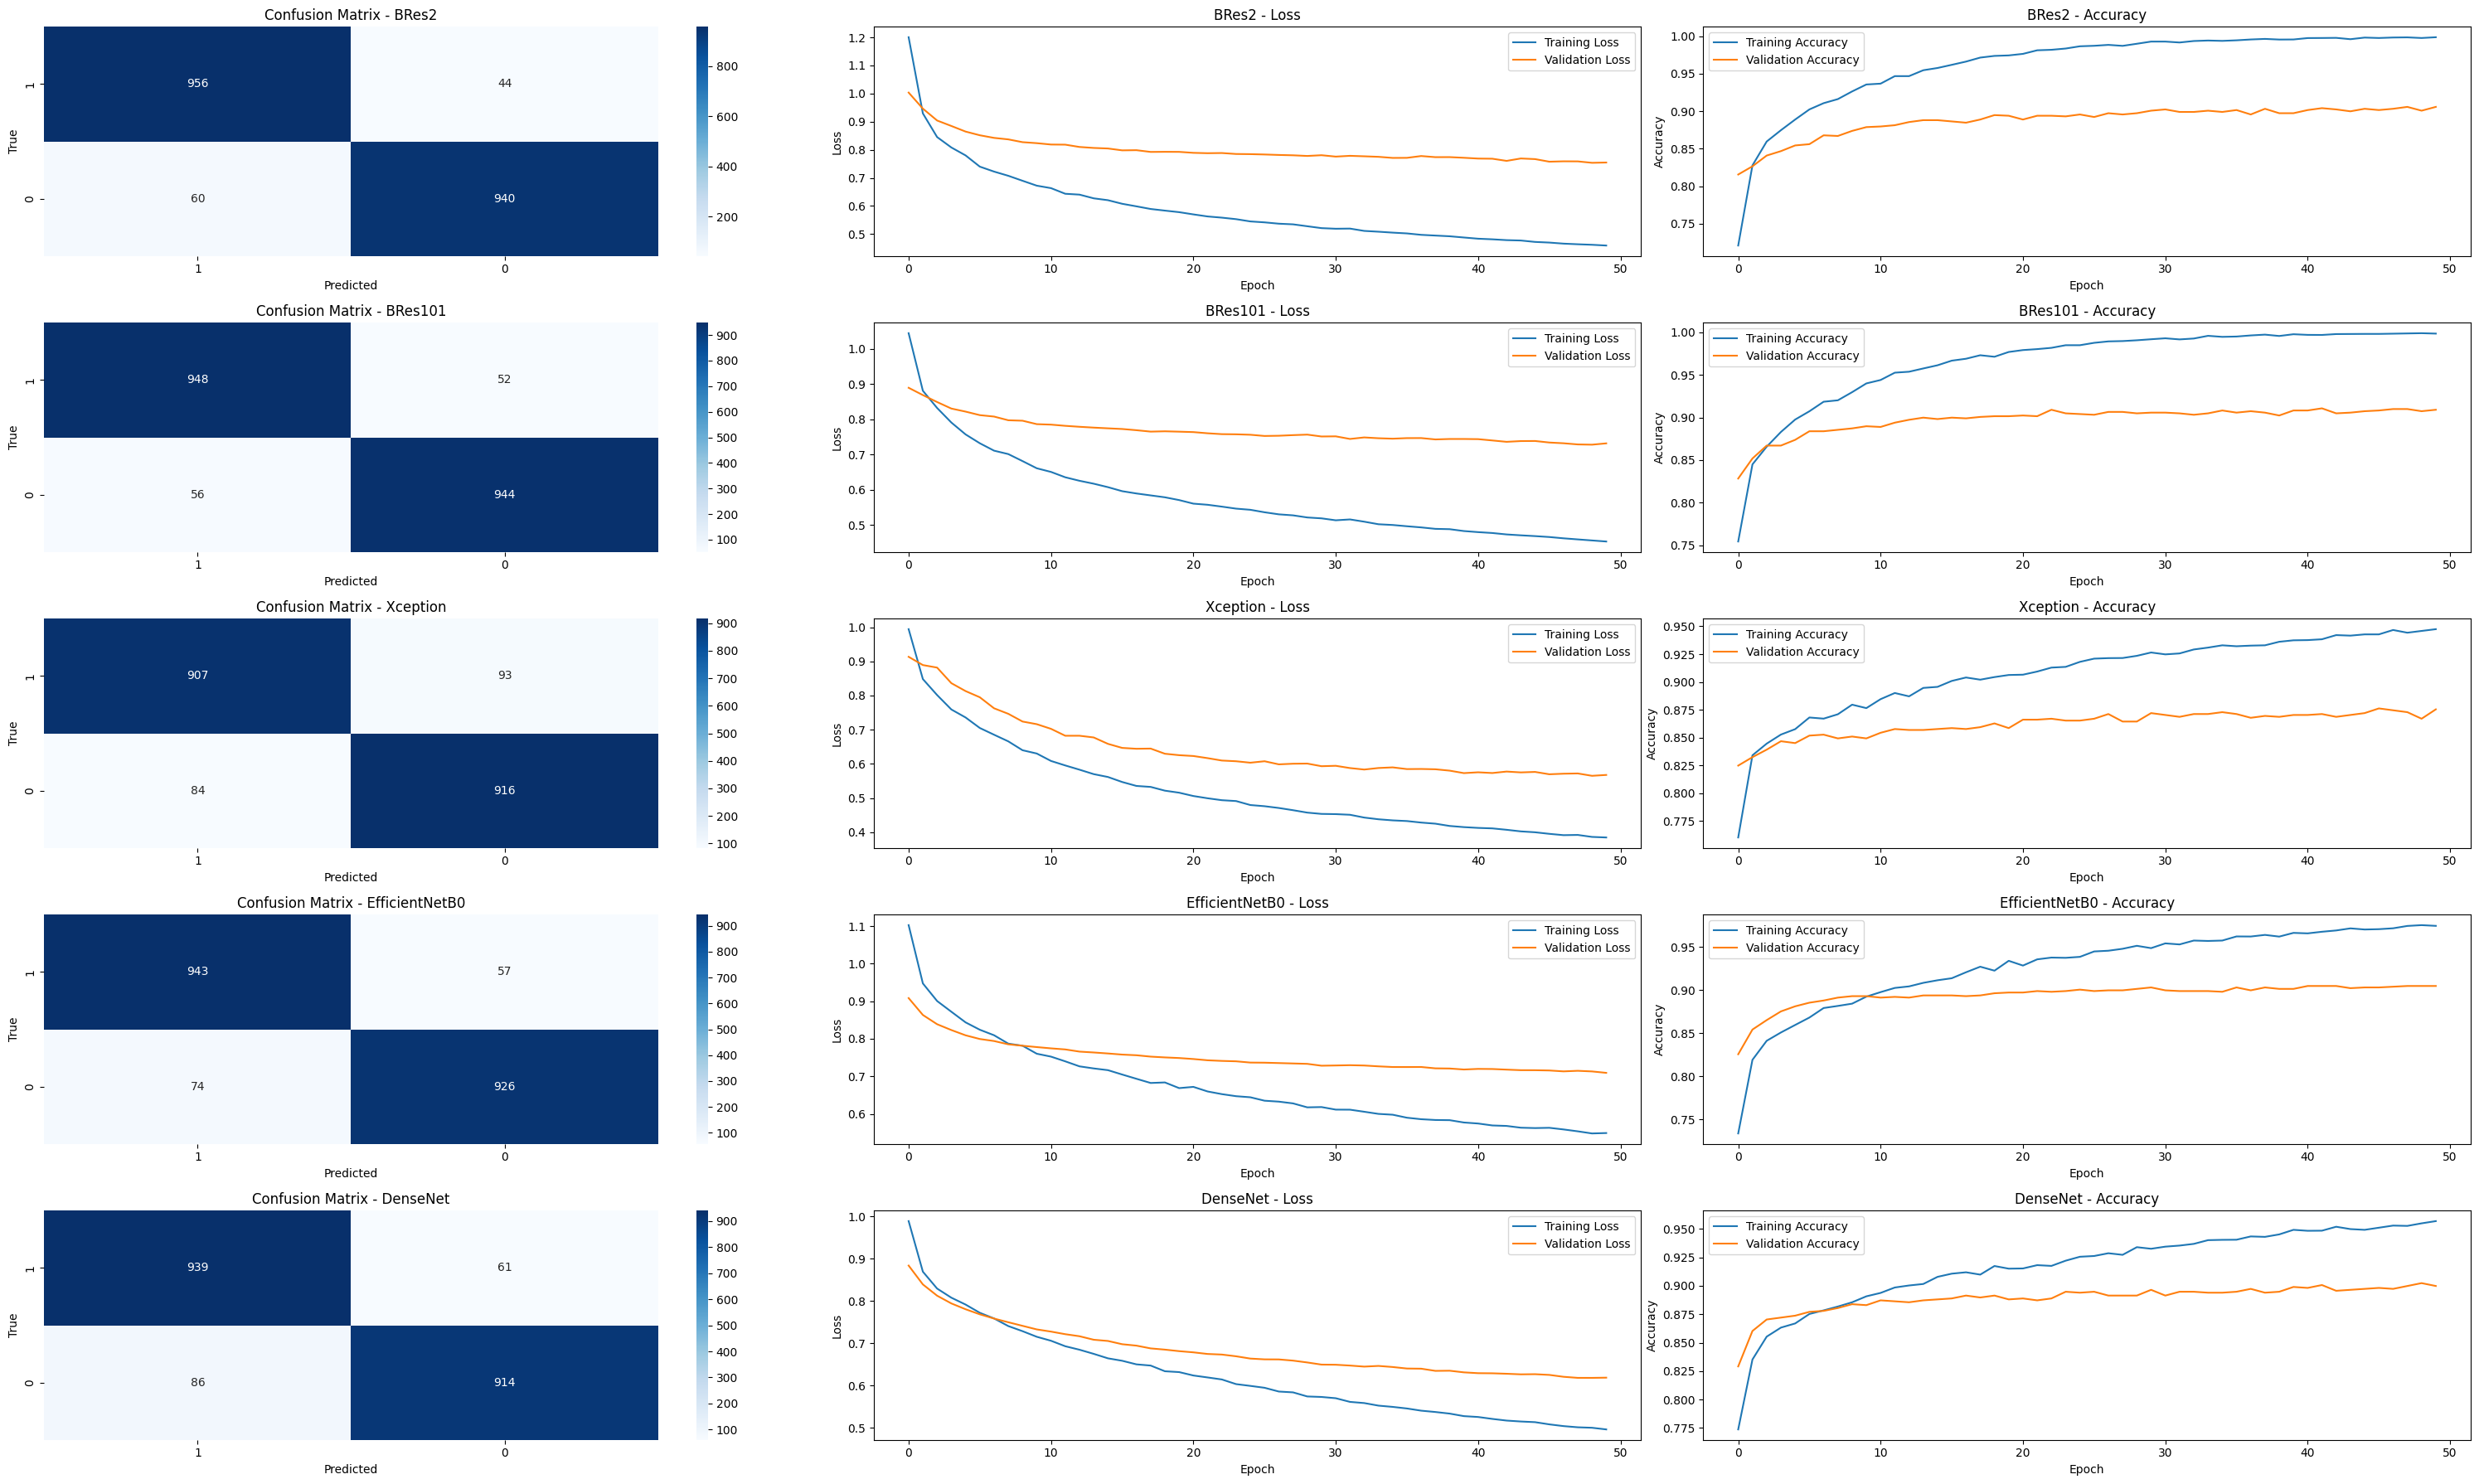

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import pickle
from tensorflow.keras.models import load_model

# Matplotlib configuration for the new pl


# List of models and histories
models = [model1, model2, model3, model4, model5]
model_names = ['BRes2', 'BRes101', 'Xception', 'EfficientNetB0', 'DenseNet']
histories = [history1, history2, history3, history4, history5]

# Function to generate predictions and evaluation metrics
def evaluate_and_plot_confusion_matrix(model, test_stack, test_df, model_name):
    # Evaluate the model on the test data
    output = model.predict(test_stack)
    prediction = [np.argmax(i) for i in output]

    # Print model evaluation metrics
    print("-" * 60)
    print(f'Model Name - {model_name}')
    print(f'Accuracy Score : {accuracy_score(test_df.label, prediction):.4f}')
    print(f'Precision Score : {precision_score(test_df.label, prediction, average="weighted"):.4f}')
    print(f'Recall Score : {recall_score(test_df.label, prediction, average="weighted"):.4f}')
    print(f'F1 Score : {f1_score(test_df.label, prediction, average="weighted"):.4f}')
    print()

    # Generate confusion matrix
    conf_matrix = confusion_matrix(test_df.label, prediction)
    print("Confusion Matrix:")
    print(conf_matrix)

    return conf_matrix, test_df.label.unique()

# Create a figure with subplots
plt.figure(figsize=(30, 18))  # Increased size for better visualization with more subplots

for i, (model, history, model_name) in enumerate(zip(models, histories, model_names)):
    conf_matrix, class_labels = evaluate_and_plot_confusion_matrix(model, test_stack, test_df, model_name)

    plt.subplot(5, 3, 3*i + 1)
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('True')

    # Loss
    plt.subplot(5, 3, 3*i + 2)
    plt.plot(history['loss'], label='Training Loss')
    plt.plot(history['val_loss'], label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title(f'{model_name} - Loss')
    plt.legend()

    # Accuracy
    plt.subplot(5, 3, 3*i + 3)
    plt.plot(history['accuracy'], label='Training Accuracy')
    plt.plot(history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title(f'{model_name} - Accuracy')
    plt.legend()

plt.tight_layout()
plt.savefig('combined_conf_and_history.svg', format='svg')
plt.show()


# Model summary

In [16]:
from tensorflow.keras.models import load_model



# Create a list of models with names for easy iteration
models = [
    ('Model 1: BRes2', model1),
    ('Model 2: BRes101', model2),
    ('Model 3: Xception', model3),
    ('Model 4: EfficientNetB0', model4),
    ('Model 5: DenseNet', model5),
]

# Print the summary for each model
for model_name, model in models:
    print(f"{model_name} Summary:")
    model.summary()
    print("\n" + "="*80 + "\n")


Model 1: BRes2 Summary:
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 flatten_2 (Flatten)         (None, 100352)            0         
                                                                 
 batch_normalization_100 (B  (None, 100352)            401408    
 atchNormalization)                                              
                                                                 
 dense_4 (Dense)             (None, 128)               12845184  
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_5 (Dense)             (None, 2)                 258       
                              

# All clasification report

In [17]:
import numpy as np
from tensorflow.keras.models import load_model
from sklearn.metrics import classification_report

# Load your models


models = [model1, model2, model3, model4, model5]
model_names = ['BRes2', 'BRes101', 'Xception', 'EfficientNetB0', 'DenseNet']



for model, model_name in zip(models, model_names):
    # Prediction
    predictions = model.predict(test_stack)
    predicted_labels = np.argmax(predictions, axis=1)

    # Generate Classification Report
    report = classification_report(test_df['label'], predicted_labels, target_names=['Benign', 'Malignant'], digits=4)

    # Display the classification report
    print(f"Classification Report for {model_name}:\n{report}\n")


63/63 [==============================] - 6s 92ms/step
Classification Report for BRes2:
              precision    recall  f1-score   support

      Benign     0.9409    0.9560    0.9484      1000
   Malignant     0.9553    0.9400    0.9476      1000

    accuracy                         0.9480      2000
   macro avg     0.9481    0.9480    0.9480      2000
weighted avg     0.9481    0.9480    0.9480      2000


63/63 [==============================] - 4s 62ms/step
Classification Report for BRes101:
              precision    recall  f1-score   support

      Benign     0.9442    0.9480    0.9461      1000
   Malignant     0.9478    0.9440    0.9459      1000

    accuracy                         0.9460      2000
   macro avg     0.9460    0.9460    0.9460      2000
weighted avg     0.9460    0.9460    0.9460      2000


63/63 [==============================] - 8s 122ms/step
Classification Report for Xception:
              precision    recall  f1-score   support

      Benign     0.915

# installing shap libraries

In [ ]:
!pip install shap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 16.0 MB/s eta 0:00:00


# loading the model

In [ ]:
# Load your trained model
model_1 = keras.models.load_model('BRes2.h5')

# applying shap

In [ ]:
import shap
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow import keras



# Set up ImageDataGenerator for your test set
# Assuming your test data directory is correctly defined and structured
test_datagen = ImageDataGenerator(rescale=1./255)

# Create a test generator
test_generator = test_datagen.flow_from_directory(
    '/content/test',  # Define the correct path to your test data directory
    target_size=(224, 224),  # Match your model input size
    batch_size=2,  # Adjust the batch size as needed
    class_mode='binary',
    shuffle=False
)

# Skip the first 99 batches (if needed)
# for _ in range(99):
#     test_generator.next()

# Take a batch of test data
X_test, y_test = next(test_generator)

# Select a smaller subset for SHAP analysis (e.g., first 16 samples)
X_test_subset = X_test[:2]

# Create a SHAP explainer using the GradientExplainer
explainer = shap.GradientExplainer(model_1, X_test_subset)

# Compute SHAP values for the subset
shap_values = explainer.shap_values(X_test_subset)

# Visualize and save the SHAP values for each image in the batch
for i in range(len(X_test_subset)):
    fig, ax = plt.subplots(figsize=(8, 8))  # Set the figure size to be square (8x8)
    shap.image_plot([shap_values[j][i] for j in range(len(shap_values))], np.squeeze(X_test_subset[i:i+1]), show=False)
    plt.axis('off')  # Hide axes for a cleaner image
    plt.savefig(f'shap_plot_{i}.png', bbox_inches='tight', pad_inches=0, format='png', dpi=200)
    plt.close(fig)


# installing LIME lbraries

In [ ]:
!pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 9.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=71debf6b7e15f334389d48dc3aecae2d41c8444f7dccfd6d0570b9c9db7c703f
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


# applying LIME

Found 2000 images belonging to 2 classes.
1/1 [==============================] - 0s 26ms/step
Predicted class: Benign
Actual class: Benign


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 34ms/step


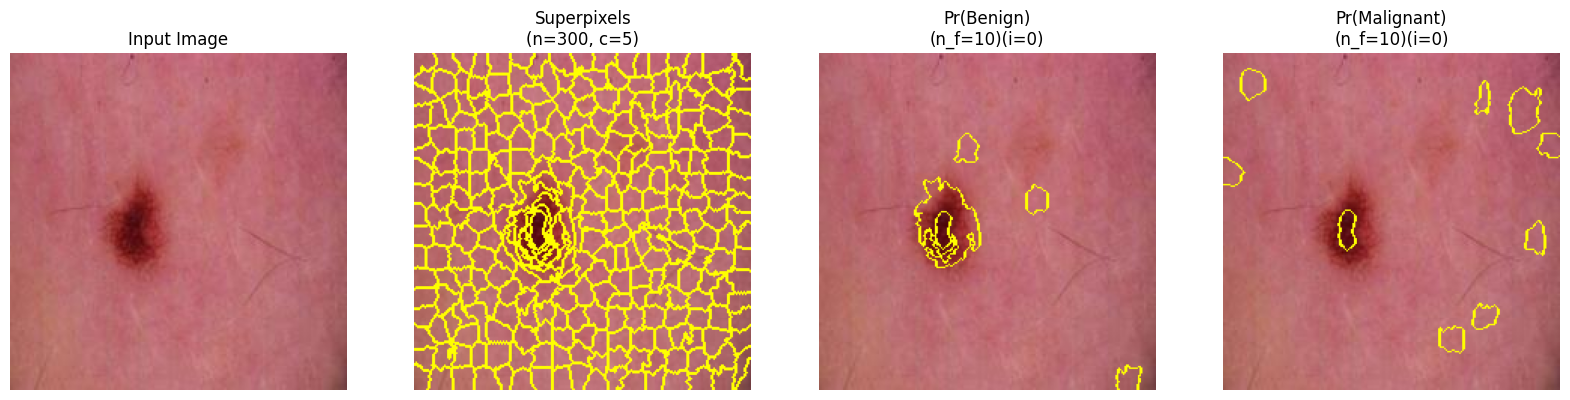

1/1 [==============================] - 0s 31ms/step
Predicted class: Benign
Actual class: Benign


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 63ms/step


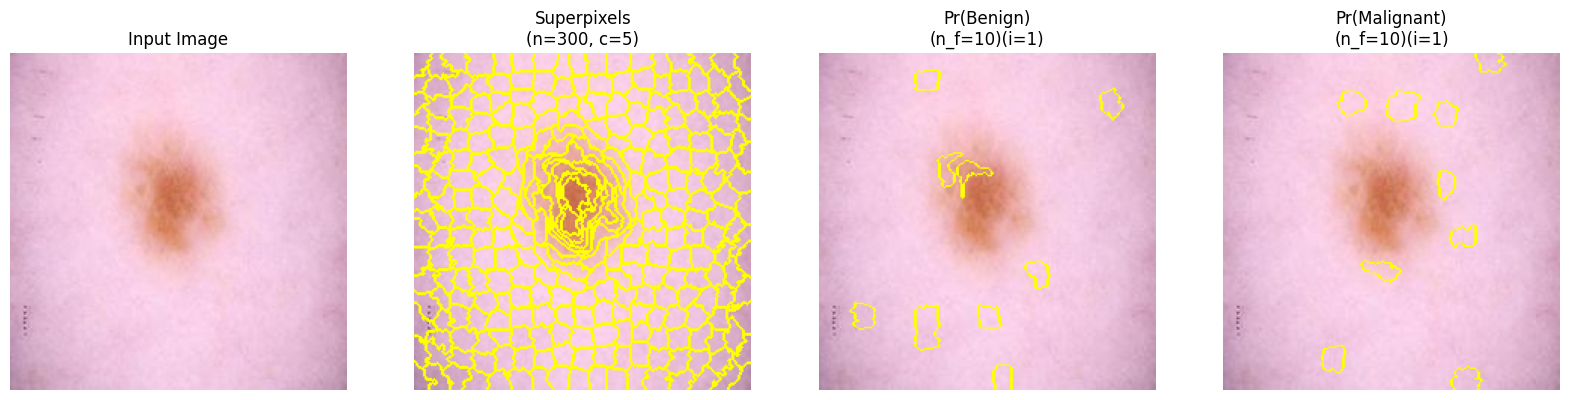

1/1 [==============================] - 0s 39ms/step
Predicted class: Benign
Actual class: Benign


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 28ms/step


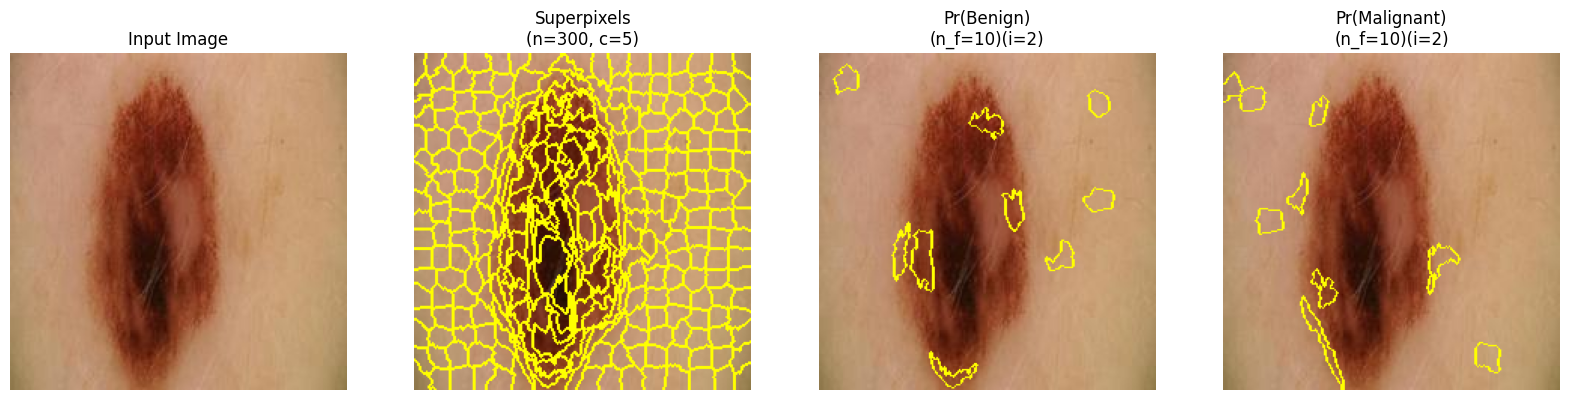

1/1 [==============================] - 0s 39ms/step
Predicted class: Benign
Actual class: Benign


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 48ms/step


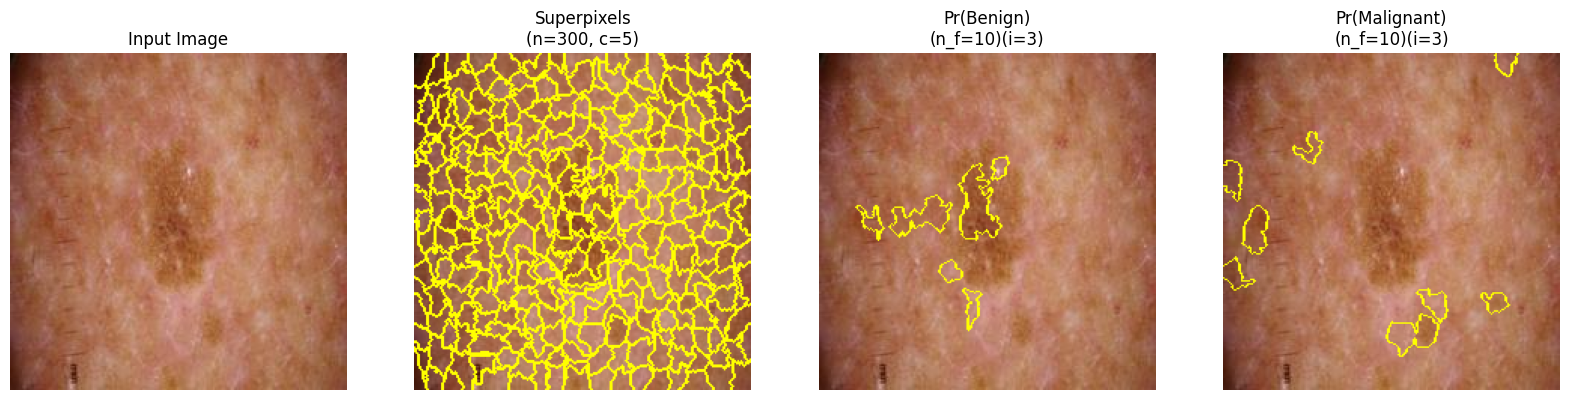

In [ ]:
import numpy as np
from lime import lime_image
from skimage.segmentation import mark_boundaries, slic
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow import keras

# Load your trained model
# model_1 = keras.models.load_model('BRes2.h5')

# Set up ImageDataGenerator for your validation set
val_datagen = ImageDataGenerator(rescale=1./255)

# Create a validation generator
val_generator = val_datagen.flow_from_directory(
    '/content/test',  # Define the correct path to your validation data directory
    target_size=(224, 224),  # Match your model input size
    batch_size=4,  # Adjust the batch size as needed
    class_mode='binary',
    shuffle=False
)

# Function to get the class labels
class_labels = list(val_generator.class_indices.keys())

# Initialize the LIME explainer
explainer = lime_image.LimeImageExplainer()

# Function to make predictions
def predict_fn(images):
    images = np.array(images)
    return model_1.predict(images)

# Function to generate LIME explanation for a single image
def generate_lime_explanation(image_index, sample_image, sample_label, n_segments, compactness, num_features_list):
    # Normalize the sample image
    sample_image = (sample_image - 0.5) * 2

    # Get the model's prediction for the sample image
    predictions = model_1.predict(np.expand_dims(sample_image, axis=0))
    predicted_class = np.argmax(predictions, axis=1)[0]
    predicted_class_label = class_labels[predicted_class]

    # Get the actual class label
    actual_class_label = class_labels[int(sample_label)]

    print(f"Predicted class: {predicted_class_label}")
    print(f"Actual class: {actual_class_label}")

    # Explain the prediction on the sample image
    explanation = explainer.explain_instance(
        sample_image.astype('double'),
        predict_fn,
        top_labels=2,  # Explain the top 2 predicted classes (for binary)
        hide_color=0,
        num_samples=1000,  # Increase the number of samples for more accurate explanations
        segmentation_fn=lambda img: slic(img, n_segments=n_segments, compactness=compactness)  # Adjust n_segments and compactness
    )

    for num_features in num_features_list:
        # Create a figure with multiple subplots
        fig, axes = plt.subplots(1, 4, figsize=(20, 8))  # Adjusted to 4 subplots for two classes

        # Display the original image
        axes[0].imshow(sample_image / 2 + 0.5)
        axes[0].set_title('Input Image')
        axes[0].axis('off')

        # Display the superpixels
        superpixels = mark_boundaries(sample_image / 2 + 0.5, explanation.segments)
        axes[1].imshow(superpixels)
        axes[1].set_title(f'Superpixels\n(n={n_segments}, c={compactness})')
        axes[1].axis('off')

        # Display explanations for top labels
        for j in range(2):  # Only two classes
            temp, mask = explanation.get_image_and_mask(
                explanation.top_labels,
                positive_only=True,
                num_features=num_features,  # Increase the number of superpixels to highlight
                hide_rest=False
            )
            axes[2 + j].imshow(mark_boundaries(temp / 2 + 0.5, mask))
            axes[2 + j].set_title(f'Pr({class_labels[explanation.top_labels[j]]})\n(n_f={num_features})(i={image_index})')
            axes[2 + j].axis('off')

        # Save the figure as SVG
        svg_filename = f"lime_explanation_{predicted_class_label}_{image_index}_n_{n_segments}_c_{compactness}_f_{num_features}.svg"
        plt.savefig(svg_filename, format='svg')
        plt.show()

# Skip the first 99 batches
for _ in range(9):
    val_generator.next()

# Load the 100th batch of images from the validation set
sample_images, sample_labels = val_generator.next()

# Generate explanations for each image in the 100th batch with different n_segments and compactness values
n_segments_values = [300]  # Low, moderate, and high n_segments
compactness_values = [5]  # Use a very small positive value instead of 0 for compactness
num_features_list = [10]  # Use multiple values for num_features

for i in range(len(sample_images)):
    for n_segments in n_segments_values:
        for compactness in compactness_values:
            generate_lime_explanation(i, sample_images[i], sample_labels[i], n_segments, compactness, num_features_list)
